<h1 style = "font-size:3rem;color:darkcyan"> Speech Recognition - Digits </h1>

Training model to recognize spoken digits (0-9)

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display

import os
import sklearn

In [427]:
# importing data
# using the data set from: https://github.com/soerenab/AudioMNIST
# data is structured as follows:
# /60 folders containing speech of different persons
# each folder contains 500 labeled audio files, 50 audio files for each digit

root = '../../Datasets/Speech/Digits/AudioMNIST/data/'
folder_names = os.listdir(root)

n_audio_files = 0

#print(folder_names)
for i in range(0, len(folder_names)):
    filename = os.listdir(root+folder_names[i])
    n_audio_files += len(filename)

#filenames = os.listdir(root)

#print(f'Number of audio files: {len(filenames)} ')
#root

In [428]:
n_audio_files

30000

In [429]:
# extract label/ digit. In this case it is the first digit in the file name

labels = np.zeros(n_audio_files)

def extract_label(filename):
    return filename[0]

In [430]:
# create feature array

#data, = librosa.load('./data/'+name, sr = sr, mono=True)
n_mfcc = 20
features = np.zeros((n_audio_files, n_mfcc))

In [431]:
print(folder_names)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [432]:
sr = 48000
for i in range(0, len(folder_names)):
    filesnames = '' # reset string
    filenames = os.listdir(root+folder_names[i])
    print(f'Processing folder {i + 1} out of {len(folder_names)}')
    for j in range(len(filenames)):
        data, _ = librosa.load(root + folder_names[i] + '/' + filenames[j], sr= sr, mono=True)
        mfcc = librosa.feature.mfcc(y = data, sr = sr, n_mfcc=n_mfcc)
        features[i * len(filenames) + j] = mfcc.T.mean(0) # matrix mean
        labels[i * len(filenames) + j] = extract_label(filenames[j])

Processing folder 1 out of 60
Processing folder 2 out of 60
Processing folder 3 out of 60
Processing folder 4 out of 60
Processing folder 5 out of 60
Processing folder 6 out of 60
Processing folder 7 out of 60
Processing folder 8 out of 60
Processing folder 9 out of 60
Processing folder 10 out of 60
Processing folder 11 out of 60
Processing folder 12 out of 60
Processing folder 13 out of 60
Processing folder 14 out of 60
Processing folder 15 out of 60
Processing folder 16 out of 60
Processing folder 17 out of 60
Processing folder 18 out of 60
Processing folder 19 out of 60
Processing folder 20 out of 60
Processing folder 21 out of 60
Processing folder 22 out of 60
Processing folder 23 out of 60
Processing folder 24 out of 60
Processing folder 25 out of 60
Processing folder 26 out of 60
Processing folder 27 out of 60
Processing folder 28 out of 60
Processing folder 29 out of 60
Processing folder 30 out of 60
Processing folder 31 out of 60
Processing folder 32 out of 60
Processing folder

In [433]:
print(labels)

[0. 0. 0. ... 9. 9. 9.]


Text(0.5, 0, 'Digit Label')

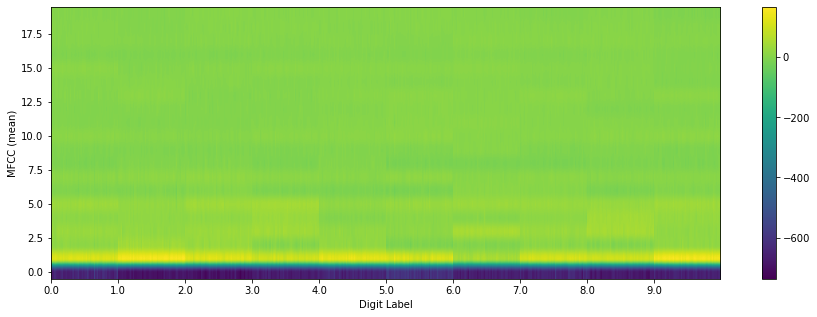

In [434]:
#plt.plot(features)
x_ticks = np.linspace(0, 450, 10)
#print(x_ticks)
x_labels = np.linspace(0, 9, 10)
#print(x_labels)
#plt.xticks(ticks=x_ticks, labels= x_labels)
#print(x_ticks)

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)

img = ax.imshow(features[:500].T)
fig.colorbar(img)

ax.set_aspect('auto')
plt.gca().invert_yaxis()

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

ax.set_ylabel('MFCC (mean)')
ax.set_xlabel('Digit Label')
#plt.title('Mel Spectrogram')

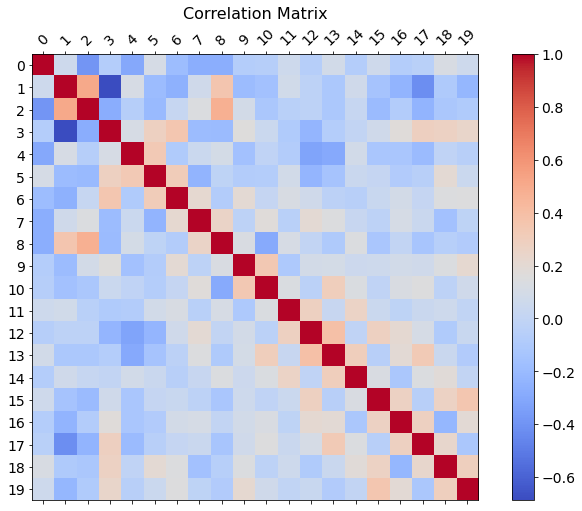

In [435]:
feature_names = np.linspace(0, n_mfcc - 1,n_mfcc)
df = pd.DataFrame(features)
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number, cmap = 'coolwarm')
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [439]:
#merging everything into a single data structure
dataset = pd.DataFrame(features)
dataset['label'] = labels
#dataset['filename'] = filenames

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
dataset.to_csv('dataset.csv')
dataset

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-651.792969,125.082855,14.676184,24.476522,14.822341,32.524208,-6.852278,14.238191,-6.298679,-6.007290,...,-1.070858,-4.968721,-0.302329,0.783053,10.485610,-9.527535,0.884058,3.378313,-0.157332,0.0
1,-675.418701,120.496872,17.857576,29.651102,18.610928,36.867523,-3.063675,10.415971,-5.865927,-2.258434,...,-4.275125,-3.186392,2.689194,1.196756,9.212469,-5.772840,4.626551,5.608649,2.007937,0.0
2,-630.504883,119.078598,13.994834,16.210178,13.585836,34.013218,-7.132136,15.575432,-7.252302,-5.977500,...,-3.518600,-2.659422,-3.452109,-0.733885,10.246149,-7.509597,4.174634,1.399633,0.845211,0.0
3,-633.645142,126.591614,9.361505,15.723633,11.496635,32.401176,-6.404471,5.314328,-11.817913,-8.420235,...,0.964620,-0.776027,0.319248,5.095439,13.526354,-8.272698,1.134416,3.302846,-1.863230,0.0
4,-661.522644,115.404343,14.578478,30.359596,11.532448,27.510567,-2.776231,8.657968,-9.531140,-4.685847,...,-1.679317,-5.533944,2.051777,2.917758,11.107314,-5.143217,-1.347403,-1.051834,-1.174666,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-666.063599,94.368408,24.866434,27.674509,21.682270,26.179129,-2.321839,0.889840,-1.831618,3.110181,...,1.124498,-6.319092,-1.859200,-6.825097,-0.514957,-8.980742,-6.473922,-3.582300,0.546544,9.0
29996,-666.681946,107.256287,35.125137,26.656052,22.323940,30.026657,-4.487443,-1.292328,2.823204,1.733122,...,-1.576584,-9.885405,-9.825562,-7.924049,-7.828240,-9.644059,-0.158530,-6.891603,-3.700594,9.0
29997,-681.487549,93.010468,33.671379,29.728848,27.685751,33.148720,-5.080503,-3.392767,-0.306485,-0.010222,...,-0.924768,-12.614414,-9.779232,-9.795484,-7.176035,-12.528312,-2.301409,-5.910634,-4.237979,9.0
29998,-669.299194,96.861855,29.082794,29.676912,26.404362,35.910511,-3.259255,-3.464525,0.661117,3.829483,...,-0.782386,-11.310943,-13.182616,-4.552127,-5.837046,-10.751757,1.079593,-7.937907,-4.782234,9.0


In [26]:
# retrieve from dataset
# import the dataset (extracted features) saved in a .csv
dataset = pd.read_csv(r'dataset.csv' , index_col=0)
labels = np.array(dataset.label)
features = np.array(dataset)
features = features[:, :-1] # remove label column
n_mfcc = len(features.T)
classes = np.arange(10)

(30000, 20)
(30000,)
Classes: [0 1 2 3 4 5 6 7 8 9]


In [34]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, tar_train, tar_test = train_test_split(features, labels, test_size=0.2, random_state=52)

print(f'Training size: {len(feat_train)} features and labels')
print(f'Test size: {len(feat_test)} features and labels')

Training size: 24000 features and labels
Test size: 6000 features and labels


(30000,)
Classes: [0 1 2 3 4 5 6 7 8 9]


(24000, 20)

In [35]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

In [36]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(n_mfcc), max_iter=2000, activation='relu', verbose=True)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
tar_predict = mlp.predict(feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Iteration 1, loss = 2.07024257
Iteration 2, loss = 1.30929637
Iteration 3, loss = 0.92256038
Iteration 4, loss = 0.72997661
Iteration 5, loss = 0.61843807
Iteration 6, loss = 0.54673227
Iteration 7, loss = 0.49790671
Iteration 8, loss = 0.46308865
Iteration 9, loss = 0.43722696
Iteration 10, loss = 0.41719124
Iteration 11, loss = 0.40061530
Iteration 12, loss = 0.38652239
Iteration 13, loss = 0.37462801
Iteration 14, loss = 0.36445015
Iteration 15, loss = 0.35515930
Iteration 16, loss = 0.34667541
Iteration 17, loss = 0.33960271
Iteration 18, loss = 0.33240240
Iteration 19, loss = 0.32612058
Iteration 20, loss = 0.32013044
Iteration 21, loss = 0.31510737
Iteration 22, loss = 0.31063275
Iteration 23, loss = 0.30585802
Iteration 24, loss = 0.30194520
Iteration 25, loss = 0.29817321
Iteration 26, loss = 0.29475374
Iteration 27, loss = 0.29131664
Iteration 28, loss = 0.28816045
Iteration 29, loss = 0.28539213
Iteration 30, loss = 0.28224643
Iteration 31, loss = 0.27978751
Iteration 32, los

Iteration 255, loss = 0.18571083
Iteration 256, loss = 0.18559935
Iteration 257, loss = 0.18526378
Iteration 258, loss = 0.18519525
Iteration 259, loss = 0.18547797
Iteration 260, loss = 0.18507004
Iteration 261, loss = 0.18475906
Iteration 262, loss = 0.18524672
Iteration 263, loss = 0.18460769
Iteration 264, loss = 0.18448957
Iteration 265, loss = 0.18428755
Iteration 266, loss = 0.18442951
Iteration 267, loss = 0.18414575
Iteration 268, loss = 0.18413715
Iteration 269, loss = 0.18391868
Iteration 270, loss = 0.18363413
Iteration 271, loss = 0.18353850
Iteration 272, loss = 0.18373192
Iteration 273, loss = 0.18340792
Iteration 274, loss = 0.18325582
Iteration 275, loss = 0.18307338
Iteration 276, loss = 0.18290398
Iteration 277, loss = 0.18303186
Iteration 278, loss = 0.18283454
Iteration 279, loss = 0.18285484
Iteration 280, loss = 0.18250243
Iteration 281, loss = 0.18279356
Iteration 282, loss = 0.18249140
Iteration 283, loss = 0.18238512
Iteration 284, loss = 0.18234533
Iteration 

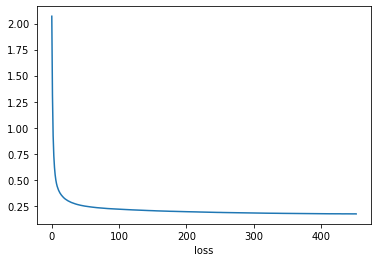

Mean squared error: 1.5230
Mean absolute error: 0.2707
Median absolute error: 0.0000
Coefficient of determination (R2 score): 0.8136
Explained variance score: 0.8136
R2 score on individual targets [0.81356656]


In [37]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.xlabel('loss')
plt.show()

#computing a set of performance metrics

#mean squared error (lower the better)
print('Mean squared error: %.4f'% sklearn.metrics.mean_squared_error(tar_test, tar_predict))

#mean absolute error (lower the better)
print('Mean absolute error: %.4f'% sklearn.metrics.mean_absolute_error(tar_test, tar_predict))

#median absolute error (lower the better)
print('Median absolute error: %.4f'% sklearn.metrics.median_absolute_error(tar_test, tar_predict))

#coefficient of determination (r2 score): 1 is perfect prediction (it can get arbitrary negative)
print('Coefficient of determination (R2 score): %.4f'% sklearn.metrics.r2_score(tar_test, tar_predict))

#explained variance score: 1 is perfect prediction (it can get arbitrary worse)
print('Explained variance score: %.4f'% sklearn.metrics.explained_variance_score(tar_test, tar_predict))

#this is is a better represenation of the r2 score when working with multiple outputs
#as it provides a value for each target value
print('R2 score on individual targets',sklearn.metrics.r2_score(tar_test, tar_predict, multioutput='raw_values') )

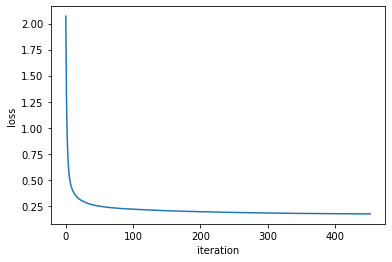

Number of mislabeled samples 438 out of 6000
Accuracy: 0.927
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       574
         1.0       0.92      0.93      0.93       588
         2.0       0.88      0.88      0.88       577
         3.0       0.88      0.91      0.89       586
         4.0       0.97      0.96      0.96       620
         5.0       0.95      0.97      0.96       608
         6.0       0.99      0.99      0.99       587
         7.0       0.96      0.93      0.95       633
         8.0       0.93      0.93      0.93       643
         9.0       0.92      0.92      0.92       584

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

confusion matrix
[[490   6  45   6   3   6   0   7   2   9]
 [  2 549   5   0  10   0   0   0   0  22]
 [ 36   4 508  24   0   0   0   3   2   0]
 [  4   0  15 532   0   0   0   0 

In [38]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
print('confusion matrix')
print(sklearn.metrics.confusion_matrix(lab_test,lab_predict))

In [234]:
def plot_confusion_matrix(true_target, predicted_target, classes, normalize = None, cmap= 'PuBu', size = [6,6], fontsize=9):
    # get confusion matrix
    cm = sklearn.metrics.confusion_matrix(true_target, predicted_target, labels = classes)
     
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Absolute Confusion Matrix'
        
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap= cmap)
    ax.figure.colorbar(im, ax=ax)
    
    
    # set labels ticks
    ticks = np.arange(cm.shape[1])
    ax.set(xticks=ticks,
           yticks=ticks,
           xticklabels=classes, 
           yticklabels=classes,
          )
    
    ax.set_title(title, fontsize = 20)
    ax.set_ylabel('True Class', fontsize = fontsize)
    ax.set_xlabel('Predicted Class', fontsize = fontsize)
     
    # style tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize , weight='bold')
    plt.setp(ax.get_yticklabels(), ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize, weight = 'bold')
    
    # plot text annotation inside each segment
     # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize = fontsize)

    fig.tight_layout()
    plt.show()
    

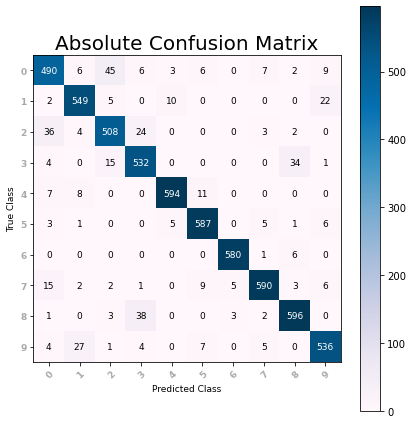

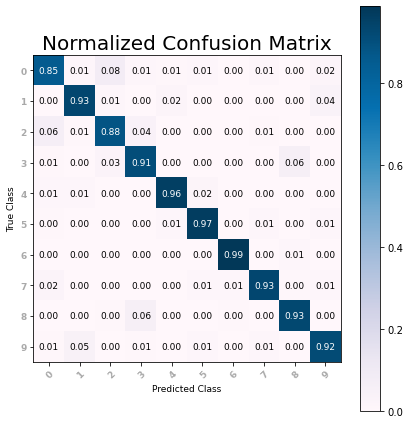

In [235]:
plot_confusion_matrix(lab_test, lab_predict, classes = classes, size = [6,6], normalize = False)
plot_confusion_matrix(lab_test, lab_predict, classes = classes, size = [6,6], normalize = True)